# PCA and tSNE on Train Set

In [39]:
# Packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Load Features

In [40]:
def combine_directory_parquets(directory_path):
    '''
    Combines all parquet files in a directory into a single dataframe.
    '''
    # If path does not end in a slash, add one
    if directory_path[-1] != '/':
        directory_path += '/'
    # list of files in directory
    file_list = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]
    # read in all parquet files
    combined_df = pd.concat([pd.read_parquet(directory_path + f) for f in file_list])
    # Return combined dataframe
    return combined_df

In [41]:
# All Features - train data
all_features_train = combine_directory_parquets('../../Data/Features/All Features/train')
all_features_train

,Image Path,ViT_Embedding_Element_0,ViT_Embedding_Element_1,ViT_Embedding_Element_2,ViT_Embedding_Element_3,ViT_Embedding_Element_4,ViT_Embedding_Element_5,ViT_Embedding_Element_6,ViT_Embedding_Element_7,ViT_Embedding_Element_8,...,ViT_Embedding_Element_1271,ViT_Embedding_Element_1272,ViT_Embedding_Element_1273,ViT_Embedding_Element_1274,ViT_Embedding_Element_1275,ViT_Embedding_Element_1276,ViT_Embedding_Element_1277,ViT_Embedding_Element_1278,ViT_Embedding_Element_1279,test_80_20
0,../../../Images/train/No Blur/Sedan_train_orig...,-0.244975,0.085045,-0.117774,-0.399902,0.034330,0.196966,-0.172954,-0.030475,-0.433943,...,0.231262,-0.059224,0.173239,0.363462,0.457626,-0.077351,-0.236950,-0.031632,-0.261893,0
1,../../../Images/train/No Blur/SUV_train_orig_t...,-0.311410,0.080667,0.144856,-0.376064,-0.551460,0.375702,-0.282547,0.083350,-0.309041,...,0.261749,0.215697,0.023538,0.393746,0.455197,0.223018,-0.265846,-0.200683,-0.405006,0
2,../../../Images/train/No Blur/Convertible_trai...,-0.048161,0.171966,-0.329507,-0.446328,-0.108216,0.354181,0.223273,-0.240402,-0.386665,...,0.010302,0.111003,0.158716,0.380261,0.493224,0.169883,-0.105756,0.124275,-0.446003,0
3,../../../Images/train/No Blur/Pickup_train_ori...,-0.291613,0.124919,0.101113,-0.145411,-0.197138,0.369833,-0.114621,0.203537,-0.129010,...,0.256229,0.048522,-0.032885,0.400770,0.430547,0.214644,-0.323948,-0.276459,-0.414079,0
4,../../../Images/train/No Blur/SUV_train_orig_t...,-0.288975,0.369587,-0.056602,-0.335338,0.238191,0.122485,-0.092619,-0.128675,-0.206104,...,0.034098,-0.089879,0.237541,0.321542,0.343445,0.047995,-0.305656,0.091199,-0.370617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,../../../Images/train/No Blur/Convertible_trai...,-0.158255,0.157451,-0.432161,-0.277322,-0.183226,0.360362,0.075823,-0.038296,-0.218423,...,0.051396,-0.170626,0.026921,0.312183,0.341269,0.320813,-0.311571,0.077954,-0.347245,0
408,../../../Images/train/No Blur/SUV_train_orig_t...,-0.418245,0.207232,0.252406,-0.184066,0.186511,0.335708,-0.253648,0.084424,0.074907,...,0.174837,-0.015541,0.334850,0.320183,0.060452,0.142291,-0.129446,-0.244659,-0.262288,0
409,../../../Images/train/No Blur/SUV_train_orig_t...,-0.150467,0.195957,0.038565,-0.442825,0.062831,0.389507,-0.077920,0.054704,-0.321771,...,0.102700,0.030044,0.330523,0.191709,0.393343,0.126389,-0.291039,-0.021738,-0.298589,0
410,../../../Images/train/No Blur/Sedan_train_orig...,-0.016809,0.228351,-0.182011,-0.242165,0.052763,0.387869,0.048351,0.074478,-0.541290,...,0.216685,0.016541,0.079678,0.477238,0.572567,0.115644,-0.315334,-0.274688,-0.190796,0


## Add Class for Visualization

In [42]:
# Parse 'Image Path'
# Split on last '/'
all_features_train['filename'] = all_features_train['Image Path'].apply(lambda x: x.split('/')[-1])
# Split on first '_' and take as Class
all_features_train['Class'] = all_features_train['filename'].apply(lambda x: x.split('_')[0])
all_features_train[['Image Path', 'filename', 'Class']]

,Image Path,filename,Class
0,../../../Images/train/No Blur/Sedan_train_orig...,Sedan_train_orig_test_01516_resized_no_blur.jpg,Sedan
1,../../../Images/train/No Blur/SUV_train_orig_t...,SUV_train_orig_train_00294_resized_no_blur.jpg,SUV
2,../../../Images/train/No Blur/Convertible_trai...,Convertible_train_orig_train_04236_resized_no_...,Convertible
3,../../../Images/train/No Blur/Pickup_train_ori...,Pickup_train_orig_train_03906_resized_no_blur.jpg,Pickup
4,../../../Images/train/No Blur/SUV_train_orig_t...,SUV_train_orig_test_01344_resized_no_blur.jpg,SUV
...,...,...,...
407,../../../Images/train/No Blur/Convertible_trai...,Convertible_train_orig_train_04167_resized_no_...,Convertible
408,../../../Images/train/No Blur/SUV_train_orig_t...,SUV_train_orig_test_03768_resized_no_blur.jpg,SUV
409,../../../Images/train/No Blur/SUV_train_orig_t...,SUV_train_orig_train_06972_resized_no_blur.jpg,SUV
410,../../../Images/train/No Blur/Sedan_train_orig...,Sedan_train_orig_test_07188_resized_no_blur.jpg,Sedan


In [43]:
# Create column y
# Encode Class as 0 for SUV, 1 for Sedan, 2 for Pickup, 3 for Convertible
class_mapping = {'SUV': 0, 'Sedan': 1, 'Pickup': 2, 'Convertible': 3}
y = all_features_train['Class'].map(class_mapping)
y[:5]

0    1
1    0
2    3
3    2
4    0
Name: Class, dtype: int64

## Create Feature Matrices

In [44]:
# Vision transformer features
vit_feature_columns = [col for col in all_features_train.columns if 'ViT' in col]
vit_features = np.array(all_features_train[vit_feature_columns])
print('vit features shape:', vit_features.shape)

# All features
all_features = np.array(all_features_train.drop(columns=['Image Path', 'filename', 'Class', 'test_80_20']))
print('all features shape:', all_features.shape)

vit features shape: (6596, 1280)
all features shape: (6596, 1280)


## Run PCA

In [45]:
def get_PCA(X_list, n_components=2):
  '''
  Takes as input a list of feature matrices and returns a list of PCA objects and a list of transformed feature matrices.
  '''
  pca_list = []
  xpca_list = []
  for X in X_list:
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X)
    X_pca = pca.transform(X)
    pca_list.append(pca)
    xpca_list.append(X_pca)
  return pca_list, xpca_list

def plot_PCA(X_list, feature_labels, n_components=2):
  '''
  Takes as input a list of feature matrices and a list of a label for each matrix and plots the principal components of each feature matrix.
  '''
  pca_list, _ = get_PCA(X_list, n_components=n_components)
  # Creating plot of cumulative share of variance explained
  plt.figure(figsize=(15,5))
  colors = ['b-', 'm-']
  labels = feature_labels
  for i in range(len(X_list)):
    plt.plot(np.cumsum(pca_list[i].explained_variance_ratio_), colors[i], label=labels[i])
  plt.xticks(np.arange(n_components)+1)
  plt.yticks(np.linspace(0, 1, 8))
  plt.grid(visible=True)
  plt.xlabel('Number of Components')
  plt.ylabel('Share of Variance Explained')
  plt.legend()
  plt.show()

def get_tsne(X_list, n_components=2):
  '''
  Takes as input a list of feature matrices and returns a list of transformed feature matrices using t-SNE.
  '''
  xtsne_list = []
  for X in X_list:
    tsne = TSNE(n_components=n_components, random_state=0)
    X_tsne = tsne.fit_transform(X)
    xtsne_list.append(X_tsne)
  return xtsne_list

## Visualize Share of Variance Explained

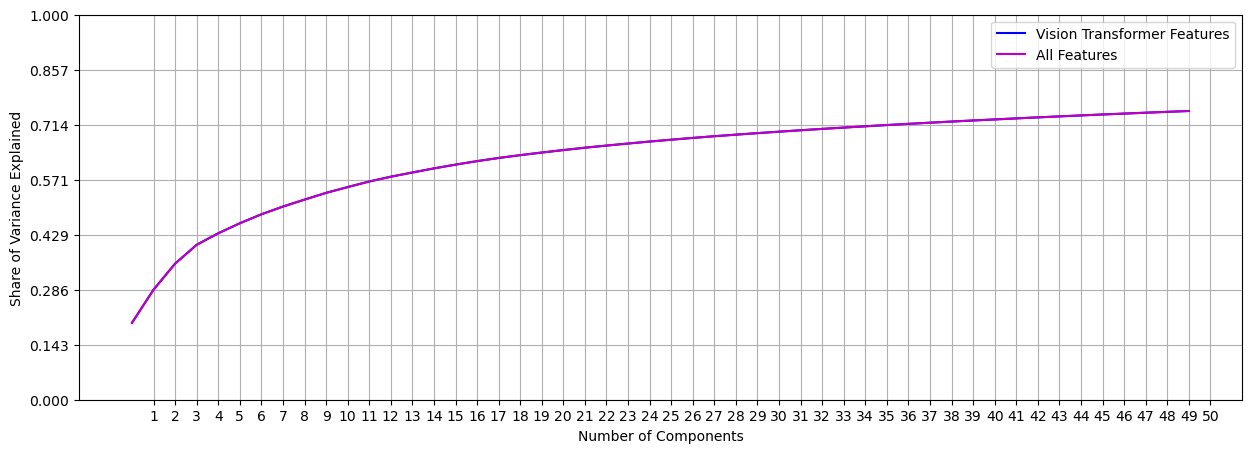

In [46]:
# plot share of variance explained vs the number of components for PCA
x = plot_PCA(X_list=[vit_features, all_features], feature_labels=['Vision Transformer Features', 'All Features'], n_components=50)

In [47]:
# dimensionality reduction
X_vit_pca, X_all_features_pca = get_PCA(X_list=[vit_features, all_features], n_components=2)[-1] # second item to get transformed features
X_vit_tsne, X_all_features_tsne  = get_tsne(X_list=[vit_features, all_features], n_components=2)

## Discriminability of Features

In [48]:
def plot_classes(X, y, ax, title):
  '''
  Plot the classes in a 2D space.
  '''

  # color code each cluster (class)
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(np.unique(y)))]

  # project the features into 2 dimensions
  for k in range(len(np.unique(y))):
    ax.scatter(X[y==k, 0], X[y==k, 1], alpha=0.5, facecolors=colorst[k])

  ax.set_title(title)

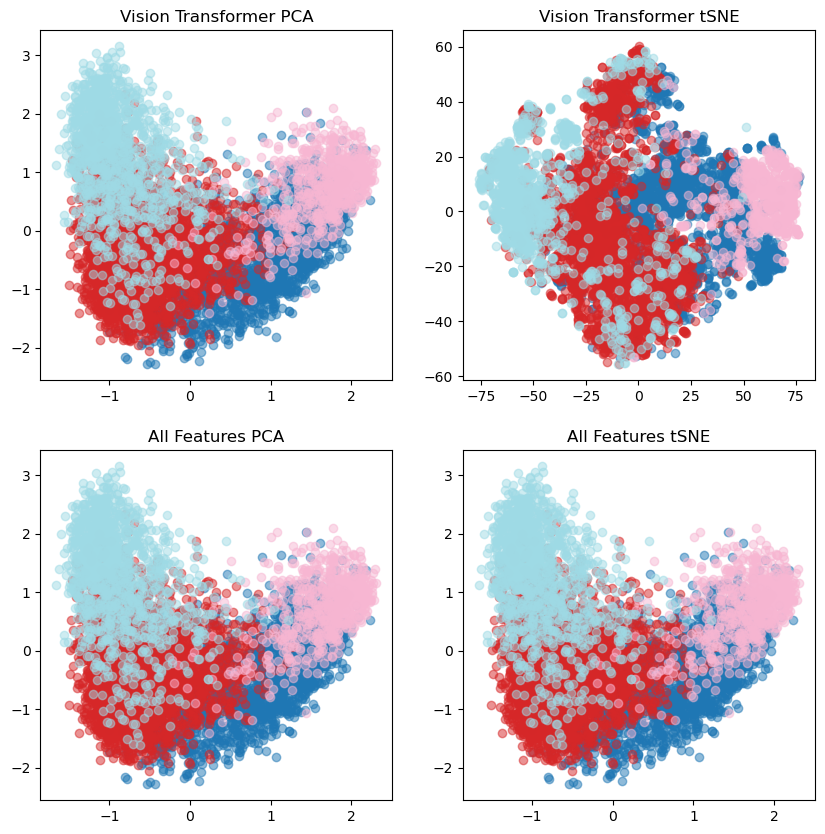

In [49]:
# plot results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

# y is the class labels (person ID)
plot_classes(X_vit_pca, y, ax[0,0], title='Vision Transformer PCA')
plot_classes(X_vit_tsne, y, ax[0,1], title='Vision Transformer tSNE')

plot_classes(X_all_features_pca, y, ax[1,0], title='All Features PCA')
plot_classes(X_all_features_pca, y, ax[1,1], title='All Features tSNE')

plt.show()